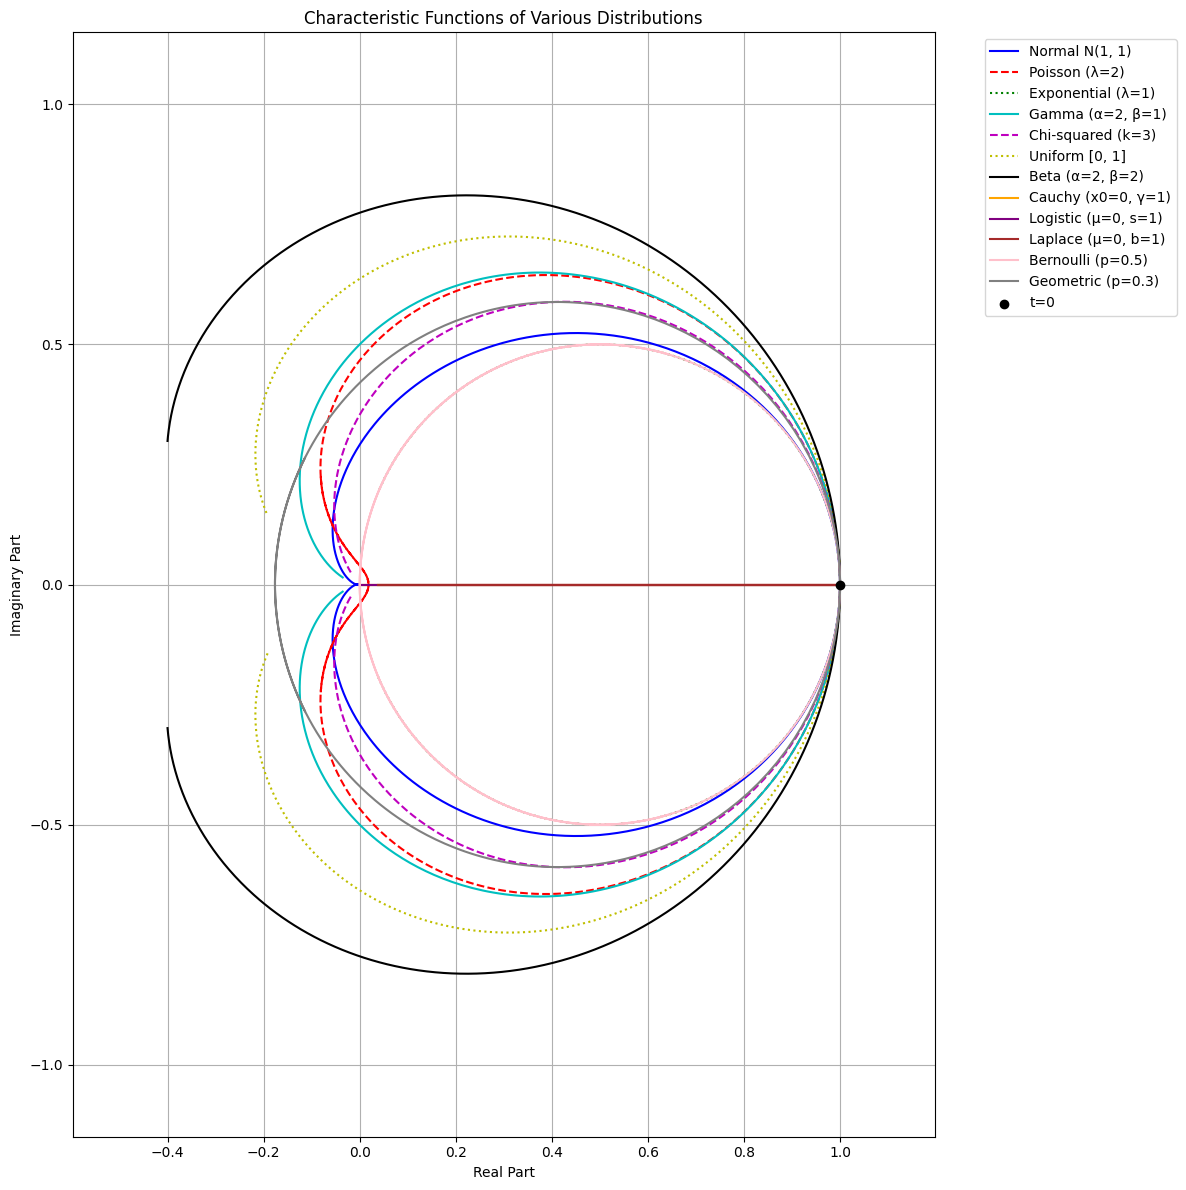

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hyp1f1

# 特性関数の定義
def char_normal(t, mu=1, sigma=1):
    """正規分布 N(mu, sigma^2)"""
    return np.exp(1j * mu * t - 0.5 * sigma**2 * t**2)

def char_poisson(t, lam=2):
    """ポアソン分布 (lambda)"""
    return np.exp(lam * (np.exp(1j * t) - 1))

def char_exponential(t, lam=1):
    """指数分布 (rate lambda)"""
    return lam / (lam - 1j * t)

def char_gamma(t, alpha=2, beta=1):
    """ガンマ分布 (shape alpha, rate beta)"""
    return (1 - 1j * t / beta) ** (-alpha)

def char_chi2(t, k=3):
    """カイ二乗分布 (degrees of freedom k)"""
    return (1 - 2 * 1j * t) ** (-k / 2)

def char_uniform(t, a=0, b=1):
    """一様分布 [a, b]"""
    t = np.where(t == 0, 1e-10, t)  # t=0での発散を回避
    return (np.exp(1j * t * b) - np.exp(1j * t * a)) / (1j * t * (b - a))

def char_beta(t, alpha=2, beta=2):
    """ベータ分布 (alpha, beta)"""
    return hyp1f1(alpha, alpha + beta, 1j * t)

def char_cauchy(t, x0=0, gamma=1):
    """コーシー分布 (location x0, scale gamma)"""
    return np.exp(1j * x0 * t - gamma * np.abs(t))

def char_logistic(t, mu=0, s=1):
    """ロジスティック分布 (location mu, scale s)"""
    return np.exp(1j * mu * t) * (np.pi * s * t / np.sinh(np.pi * s * t))

def char_laplace(t, mu=0, b=1):
    """ラプラス分布 (location mu, scale b)"""
    return np.exp(1j * mu * t) / (1 + b**2 * t**2)

def char_bernoulli(t, p=0.5):
    """ベルヌーイ分布 (probability p)"""
    return 1 - p + p * np.exp(1j * t)

def char_geometric(t, p=0.3):
    """幾何分布 (success probability p)"""
    return p * np.exp(1j * t) / (1 - (1 - p) * np.exp(1j * t))

# tの範囲
t = np.linspace(-5, 5, 1000)

# 特性関数のリスト
distributions = [
    (char_normal, "Normal N(1, 1)", 'b-', {}),
    (char_poisson, "Poisson (λ=2)", 'r--', {}),
    (char_exponential, "Exponential (λ=1)", 'g:', {}),
    (char_gamma, "Gamma (α=2, β=1)", 'c-', {}),
    (char_chi2, "Chi-squared (k=3)", 'm--', {}),
    (char_uniform, "Uniform [0, 1]", 'y:', {}),
    (char_beta, "Beta (α=2, β=2)", 'k-', {}),
    (char_cauchy, "Cauchy (x0=0, γ=1)", 'orange', {}),
    (char_logistic, "Logistic (μ=0, s=1)", 'purple', {}),
    (char_laplace, "Laplace (μ=0, b=1)", 'brown', {}),
    (char_bernoulli, "Bernoulli (p=0.5)", 'pink', {}),
    (char_geometric, "Geometric (p=0.3)", 'gray', {})
]

# プロット
plt.figure(figsize=(12, 12))
for func, label, style, kwargs in distributions:
    phi = func(t, **kwargs)
    plt.plot(phi.real, phi.imag, style, label=label)

# t=0の点を強調
plt.scatter([1], [0], color='black', label='t=0', zorder=5)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Characteristic Functions of Various Distributions')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.savefig('characteristic_functions.png')